In [30]:
import os 
import torch  
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

import torchvision

%matplotlib inline

In [31]:
test_folder = "../data/train1/"

In [32]:
random.seed(2)
image_paths= []
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    image_paths.append(image_path)

In [34]:
orginal = torchvision.transforms.Resize(size=(400,400))
gray = torchvision.transforms.Grayscale(num_output_channels=1)
color_jitter = torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5)
pad = torchvision.transforms.Pad(50, fill=0, padding_mode='constant')
random_crop = torchvision.transforms.RandomCrop((200, 300), fill=0, padding_mode='constant')
horizontal_flip = torchvision.transforms.RandomHorizontalFlip(p=1)
vertical_flip = torchvision.transforms.RandomVerticalFlip(p=1)
random_persp = torchvision.transforms.RandomPerspective(distortion_scale=0.5, p=1, interpolation=3, fill=0)
random_rotation = torchvision.transforms.RandomRotation(degrees = 360)

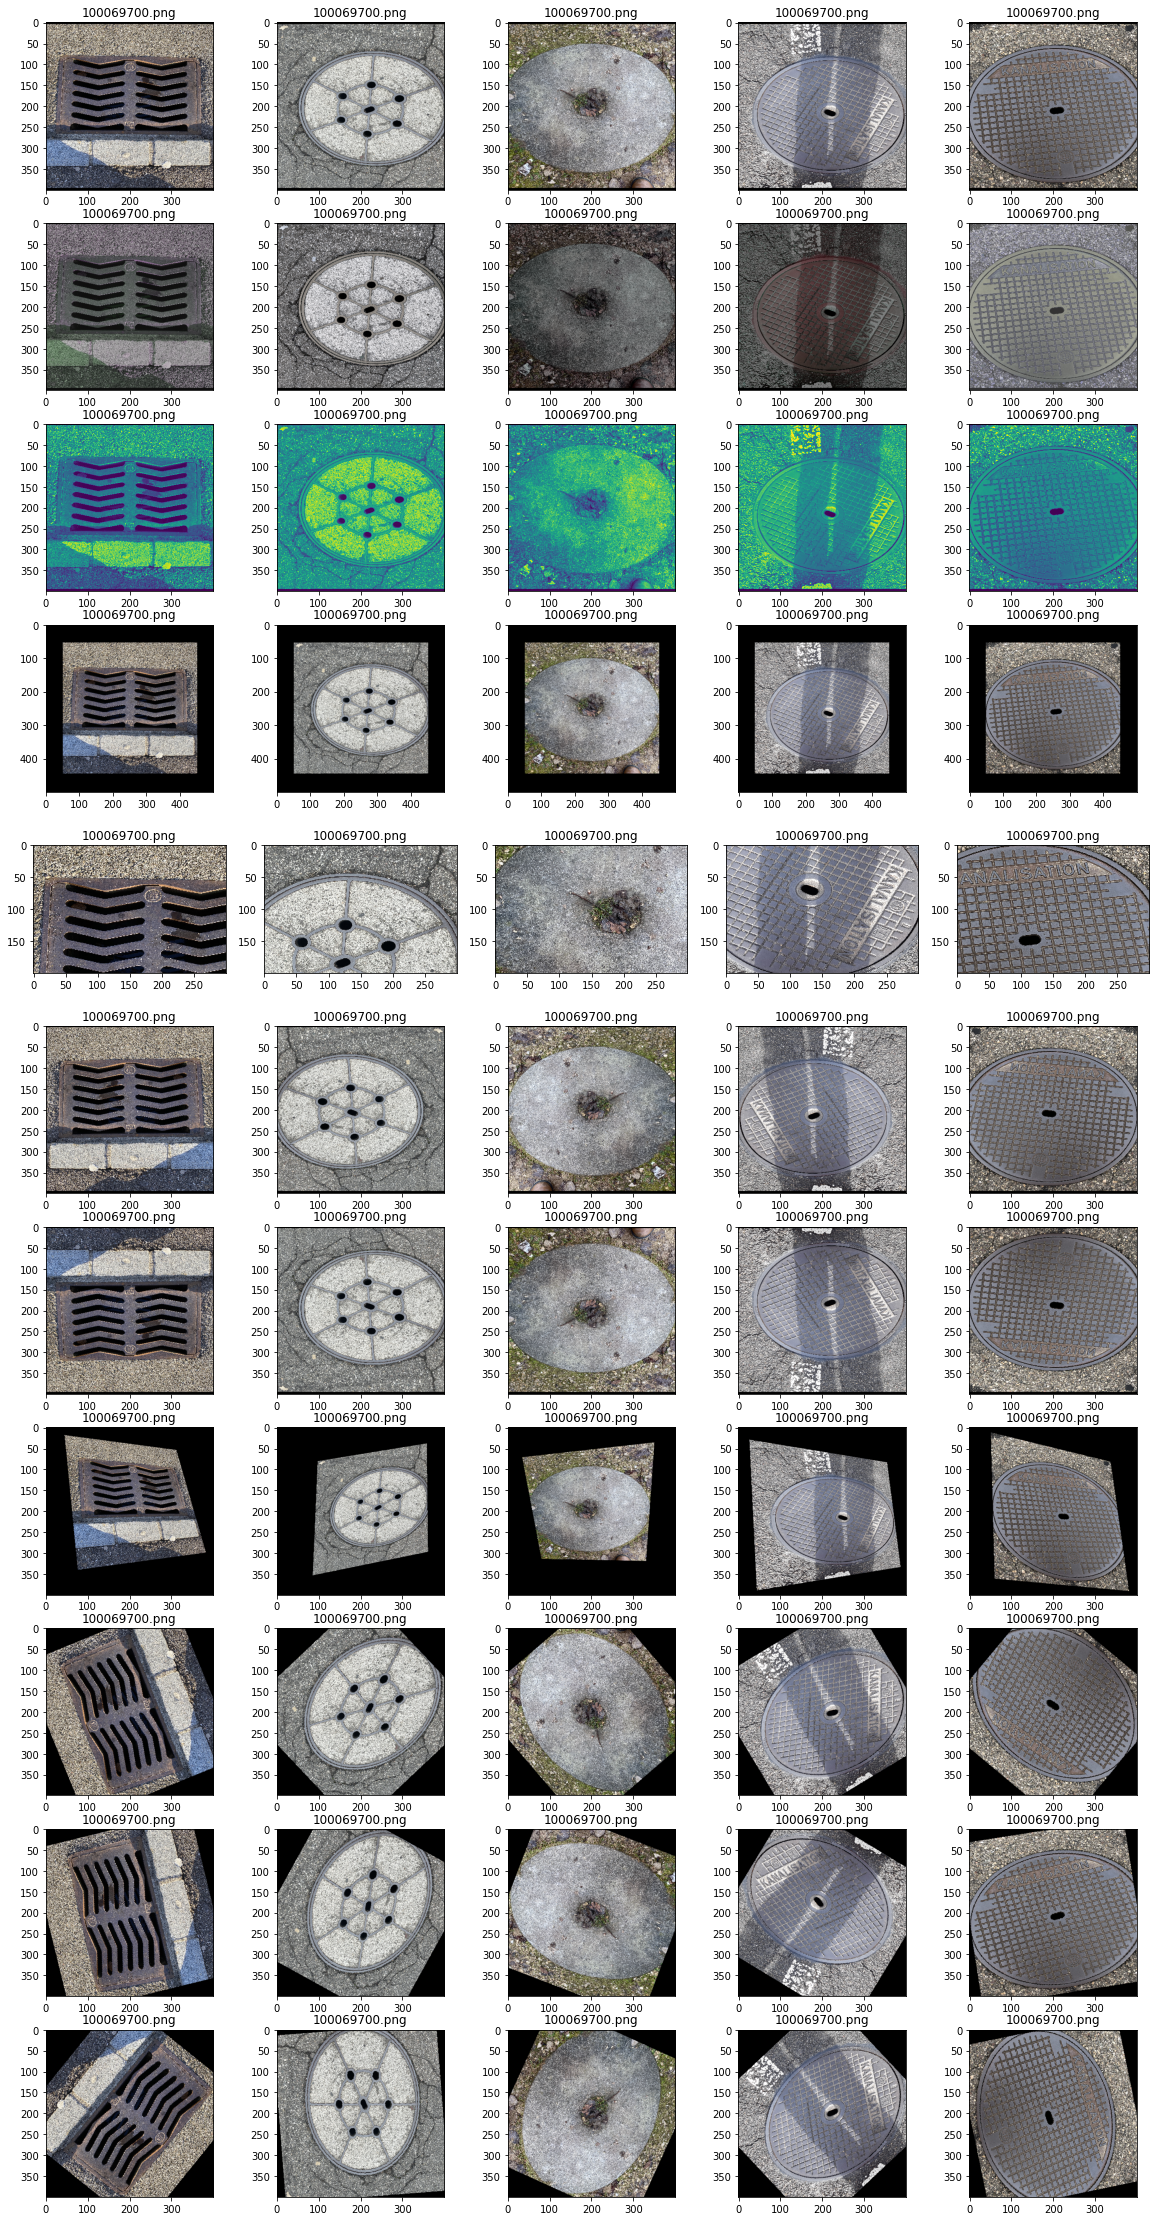

In [87]:
plt.figure(figsize=(20,40))
augmentations = [ orginal, color_jitter, gray, pad, random_crop, horizontal_flip, vertical_flip, random_persp, random_rotation,random_rotation,random_rotation]
k = 0

test_folder="../data/images_transformed"
for augmentations in augmentations:    
    for image_path in image_paths:
        img=Image.open(image_path)
        img = augmentations(img)
        ax=plt.subplot(11,5,k+1)
        ax.title.set_text(file)
        plt.imshow(img)
        k = k+1   

#### save new csv with flip_agumentation

In [86]:
train_df = pd.read_csv("../data/train_o.csv")

In [87]:
train_df_double_flip = train_df.copy()
train_df_horizontal_flip = train_df.copy()
train_df_vertical_flip = train_df.copy()

In [88]:
train_df_double_flip.image = train_df_double_flip.image.astype(str).str[:9] + "_double_flip.png"
train_df_horizontal_flip.image = train_df_horizontal_flip.image.astype(str).str[:9] + "_horizontal_flip.png"
train_df_vertical_flip.image = train_df_vertical_flip.image.astype(str).str[:9] + "_vertical_flip.png"

In [96]:
frames = [train_df,train_df_double_flip, train_df_horizontal_flip, train_df_vertical_flip]

train_df_flip = pd.concat(frames)

In [98]:
train_df_flip.to_csv('../data/train_flip.csv', index=False)